In [1]:
using PyCall
using PyPlot
using FFTW
using LinearAlgebra
using JLD2
using YAML
# FFTW.set_num_threads(16)

@pyimport mpl_toolkits.axes_grid1 as axgrid
@pyimport matplotlib.font_manager as fm
@pyimport mpl_toolkits.axes_grid1.anchored_artists as ac
plt.style.use("dark_background")
# plt.style.use("default")
plt.rc("font", family="STIXGeneral")
plt.rc("font", size=22)
plt.rc("mathtext", fontset="stix")

mpl = pyimport("matplotlib")
np = pyimport("numpy")

config = YAML.load_file("../config.yaml")

Dict{Any, Any} with 16 entries:
  "DM_particle_mass_Dark" => 0.00472716
  "run_name"              => "density_cube_snap_099_full_1024_all_species"
  "xmin"                  => 0.0
  "num_scales"            => 10
  "GAS_particle_mass_TNG" => 0.000743736
  "output_directory"      => "/global/cscratch1/sd/james12/NEXUS_analysis/"
  "nx"                    => 1024
  "N_GAS"                 => 15625000000
  "num_snaps"             => 1
  "snapfile_root"         => 99
  "algorithm"             => "NEXUS+"
  "input_directory"       => "/global/cscratch1/sd/james12/Illustris_TNG_Data/T…
  "simulation_type"       => "All"
  "DM_particle_mass_TNG"  => 0.00398343
  "N_DM"                  => 15625000000
  "xmax"                  => 205000.0

# Let's Load in the Maximum Signatures

We load in maximum signatures from the NEXUS algorithm run of the Dark Matter only simulation with resolution $1024^3$

In [2]:
config["output_directory"] *"Full_Species_1024_snap_099/"* "max_sigs_" * config["run_name"] * "_NEXUSPLUS" * "_full_signatures.jld2"

"/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/max_sigs_density_cube_snap_099_full_1024_all_species_NEXUSPLUS_full_signatures.jld2"

In [3]:
@load config["output_directory"] *"Full_Species_1024_snap_099/"* "max_sigs_" * config["run_name"] * "_NEXUSPLUS" * "_full_signatures.jld2" sigmax

1-element Vector{Symbol}:
 :sigmax

In [13]:
load_string = config["input_directory"] * config["run_name"] * ".jld2"

@load load_string den

1-element Vector{Symbol}:
 :den

In [14]:
load_string

"/global/cscratch1/sd/james12/Illustris_TNG_Data/TNG_Density_Cubes/simple_density_cubes/density_cube_snap_099_full_1024_all_species.jld2"

In [30]:
plt.style.use("default")
plt.rc("font", family="STIXGeneral")
plt.rc("font", size=22)
plt.rc("mathtext", fontset="stix")
plt.rc("axes", facecolor="midnightblue")
plt.rc("axes", linewidth=3)
fontprops = fm.FontProperties(size=16)

PyObject <matplotlib.font_manager.FontProperties object at 0x1555005daa50>

In [6]:
slice = 1000:1010
sigmax_ = sum(sigmax[:,:,slice,:], dims=3)
size(sigmax_)

(1024, 1024, 1, 3)

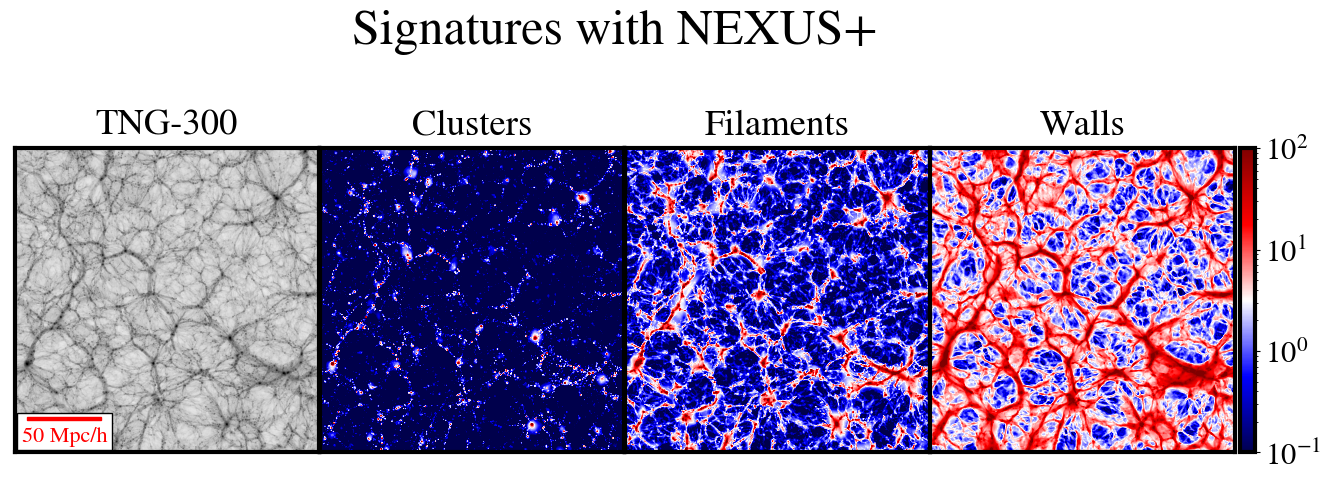

In [54]:

# plt.style.use("light_mode")

# plt.style.use("dark_mode")
# plt.rcParams["axes.linewidth"] = 3

cmap_ = "seismic"
slice = 500:525
sigmax_ = sum(sigmax[:,:,slice,:], dims=3)
den_ = sum(den[:,:,slice], dims=3)

f, axes = plt.subplots(1,4,sharey=true, gridspec_kw = Dict("wspace" => -0.06, "hspace" => 0), figsize=(16,6))

f.suptitle("Signatures with NEXUS+", fontsize=36)

axes[1].set_title("TNG-300", pad=10)
im1 = axes[1].imshow(den_[:,:,1], origin="lower", cmap="Greys", 
    extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.1, vmax=10000.0))

divider1 = axgrid.make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cax1.set_axis_off()


axes[2].set_title("Clusters", pad=10)
im2 = axes[2].imshow(sigmax_[:,:,1,1], origin="lower", cmap=cmap_, 
    extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.1, vmax=100.0))

divider2 = axgrid.make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cax2.set_axis_off()

axes[3].set_title("Filaments", pad=10)
im3 = axes[3].imshow(sigmax_[:,:,1,2], origin="lower", cmap=cmap_, 
    extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.1, vmax=100.0))
divider3 = axgrid.make_axes_locatable(axes[3])
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cax3.set_axis_off()

axes[4].set_title("Walls", pad=10)
im4 = axes[4].imshow(sigmax_[:,:,1,3], origin="lower", cmap=cmap_, 
    extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.1, vmax=100.0))
divider4 = axgrid.make_axes_locatable(axes[4])
cax4 = divider4.append_axes("right", size="5%", pad=0.05)



for ax in axes
    ax.set_aspect("equal")
    # if ax == axes[1]
    #     ax.set_xlabel("x [Mpc/h]")
    #     ax.set_ylabel("y [Mpc/h]")
    # else
    ax.set_xticks([])
    ax.set_yticks([])
    # end
        
end

scalebar1 = ac.AnchoredSizeBar(axes[1].transData,
                           50, "50 Mpc/h", "lower left", 
                           pad=0.2,
                           color="red",
                           frameon=true,
                           size_vertical=2,
                           fontproperties=fontprops, sep=4)


axes[1].add_artist(scalebar1)
# axes[2].add_artist(scalebar2)
# axes[3].add_artist(scalebar3)
cbar = plt.colorbar(im4, cax=cax4)
# cbar.ax.get_yaxis().labelpad = 35
# cbar.ax.set_ylabel("Signature Strength", fontsize=30, rotation=-90)
f.tight_layout()
# plt.savefig("final_NEXUSPLUS_Signatures_hydro.png", dpi=300, bbox_inches="tight")
plt.show()